# Preprocessing

## Dataset

### First tries with edges

In [3]:
import cv2 as cv
import matplotlib.pyplot as plt
import skimage

In [2]:
img = cv.imread("/root/code/iamjustnick/wavewatcher/raw_data/ElPortoBee__ocean__2022.png",0)
edges = cv.Canny(img,256,256)
#Mat grayscale(img.size(), CV_MAKETYPE(img.depth(), 1))

In [ ]:
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
plt.imshow(edges,cmap = 'gray')

In [ ]:
plt.imshow(img)

In [ ]:
# /root/code/iamjustnick/wavewatcher/raw_data/ZarautzBee__ocean__2022-11-24_18_14_10__19.png
img2 = cv.imread("/root/code/iamjustnick/wavewatcher/raw_data/ZarautzBee__ocean__2022-11-24_18_14_10__19.png",1)
edges = cv.Canny(img2,624,1200)

In [ ]:
edges.shape

In [ ]:
img2.shape

In [ ]:
img.shape

In [ ]:
# gray_image = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
# edges = cv.Canny(gray_image,256,256)

In [ ]:
# gray_image.shape

In [ ]:
#/root/code/iamjustnick/wavewatcher/raw_data/HawaiBee__ocean__2022-11-24_18_08_51__7.png
img3 = cv.imread("/root/code/iamjustnick/wavewatcher/raw_data/HawaiBee__ocean__2022-11-24_18_08_51__7.png",0)
edges3 = cv.Canny(img3,624,1200)

In [ ]:
img3.shape

In [ ]:
# /root/code/iamjustnick/wavewatcher/raw_data/NigranBee__ocean__2022-11-24_18_08_16__6.png
img4 = cv.imread("/root/code/iamjustnick/wavewatcher/raw_data/NigranBee__ocean__2022-11-24_18_08_16__6.png",0)
edges4 = cv.Canny(img4,50,50)

In [ ]:
plt.matshow(edges4)

In [ ]:
img4.shape

### Thresholds

In [5]:
import numpy as np
import glob
import matplotlib.pyplot as plt
import imageio.v3 as iio
import skimage.color
import skimage.filters
%matplotlib widget

In [ ]:
path_1 = '/root/code/iamjustnick/wavewatcher/raw_data/HawaiBee__ocean__2022-11-24_18_08_51__7.png'
path_2 = '/root/code/iamjustnick/wavewatcher/raw_data/NigranBee__ocean__2022-11-24_18_08_16__6.png'
path_3 = '/root/code/iamjustnick/wavewatcher/raw_data/ZarautzBee__ocean__2022-11-24_18_14_10__19.png'
path_4 = '/root/code/iamjustnick/wavewatcher/raw_data/ElPortoBee__ocean__2022.png'

In [ ]:
image = iio.imread(uri=path_4)

fig, ax = plt.subplots()
plt.imshow(image)

In [ ]:
image.shape

In [ ]:
plt.imshow(image[350:500,:],cmap='gray')
plt.show

In [ ]:
# convert the image to grayscale
new_im = image[:,:,:3]
gray_image = skimage.color.rgb2gray(new_im)

# blur the image to denoise
blurred_image = skimage.filters.gaussian(gray_image, sigma=1.0)

fig, ax = plt.subplots()
plt.imshow(blurred_image)

In [ ]:
t = 0.65
binary_mask = blurred_image < t

fig, ax = plt.subplots()
plt.imshow(binary_mask, cmap="gray")
plt.show()

In [ ]:
print(img.shape,img2.shape,img3.shape,img4.shape)

In [ ]:
img = cv.imread(path_1,0)
img = cv.resize(img,(500,500),interpolation = cv.INTER_AREA)
img = cv.medianBlur(img,5)
ret,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,\
            cv.THRESH_BINARY,11,2)
th3 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY,15,2)
titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

In [ ]:
image_5 = iio.imread(uri=path_4)

In [ ]:
plt.imshow(image_5)
plt.show()

In [ ]:
resized = cv.resize(th2,(224,224),interpolation = cv.INTER_AREA)

In [ ]:
resized.shape


In [ ]:
plt.imshow(resized)
plt.show

### Ifs statements

In [4]:
import numpy as np

In [177]:
def preprocess_image(image,reshape_size):
    if image.shape == (570, 1015, 4):
        image = cv.cvtColor(image, cv.COLOR_BGRA2BGR)
        cropped = image[250:-100,100:]
        resized = cv.resize(cropped,(reshape_size,reshape_size),interpolation = cv.INTER_AREA)
        gray_img = np.uint8((cv.cvtColor(resized, cv.COLOR_BGR2GRAY))*250)
        edges = cv.Canny(gray_img,50,50)
        gaussian = cv.adaptiveThreshold(gray_img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY,13,3)
        (T, thresh1) = cv.threshold(resized, 0.4, 0.6,
                            cv.THRESH_BINARY_INV)
        (T, thresh) = cv.threshold(resized, 0.6, 0.9, cv.THRESH_BINARY)
        images = [edges,gaussian,thresh1.T[0],thresh1.T[1],thresh1.T[2],thresh.T[0],thresh.T[1],thresh.T[2]]
        images[0] = images[0]/250
        images[1] = images[1]/250
        
        return images
    
    elif image.shape == (582, 1034, 4):
        image = cv.cvtColor(image, cv.COLOR_BGRA2BGR)
        cropped = image[60:500,:]
        resized = cv.resize(cropped,(reshape_size,reshape_size),interpolation = cv.INTER_AREA)
        gray_img = np.uint8((cv.cvtColor(resized, cv.COLOR_BGR2GRAY))*250)
        edges = cv.Canny(gray_img,50,50)
        gaussian = cv.adaptiveThreshold(gray_img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY,13,3)
        (T, thresh1) = cv.threshold( resized, 0.4, 0.6,
                            cv.THRESH_BINARY_INV)
        (T, thresh) = cv.threshold(resized, 0.6, 0.9, cv.THRESH_BINARY)
        images = [edges,gaussian,thresh1.T[0],thresh1.T[1],thresh1.T[2],thresh.T[0],thresh.T[1],thresh.T[2]]
        images[0] = images[0]/250
        images[1] = images[1]/250
        
        return images
    
    elif image.shape == (624, 1200, 4):
        image = cv.cvtColor(image, cv.COLOR_BGRA2BGR)
        cropped = image[150:,:]
        resized = cv.resize(cropped,(reshape_size,reshape_size),interpolation = cv.INTER_AREA)
        gray_img = np.uint8((cv.cvtColor(resized, cv.COLOR_BGR2GRAY))*250)
        edges = cv.Canny(gray_img,100,100)
        gaussian = cv.adaptiveThreshold(gray_img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY,11,3)
        (T, thresh1) = cv.threshold( resized, 0.4, 0.6,
                            cv.THRESH_BINARY_INV)
        (T, thresh) = cv.threshold(resized, 0.6, 0.9, cv.THRESH_BINARY)
        images = [edges,gaussian,thresh1.T[0],thresh1.T[1],thresh1.T[2],thresh.T[0],thresh.T[1],thresh.T[2]]
        images[0] = images[0]/250
        images[1] = images[1]/250
        
        return images
    
    elif image.shape == (624, 1110, 4):
        image = cv.cvtColor(image, cv.COLOR_BGRA2BGR)
        cropped = image[350:-100,:]
        resized = cv.resize(cropped,(reshape_size,reshape_size),interpolation = cv.INTER_AREA)
        gray_img = np.uint8((cv.cvtColor(resized, cv.COLOR_BGR2GRAY))*250)
        edges = cv.Canny(gray_img,50,250)
        gaussian = cv.adaptiveThreshold(gray_img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY,9,5)
        (T, thresh1) = cv.threshold( resized, 0.4, 0.6,
                            cv.THRESH_BINARY_INV)
        (T, thresh) = cv.threshold(resized, 0.6, 0.9, cv.THRESH_BINARY)
        images = [edges,gaussian,thresh1.T[0],thresh1.T[1],thresh1.T[2],thresh.T[0],thresh.T[1],thresh.T[2]]
        images[0] = images[0]/250
        images[1] = images[1]/250
    
        return images

### Cropping

In [175]:
imagen = cv.imread(path_1,0)

NameError: name 'path_1' is not defined

<function matplotlib.pyplot.show(close=None, block=None)>

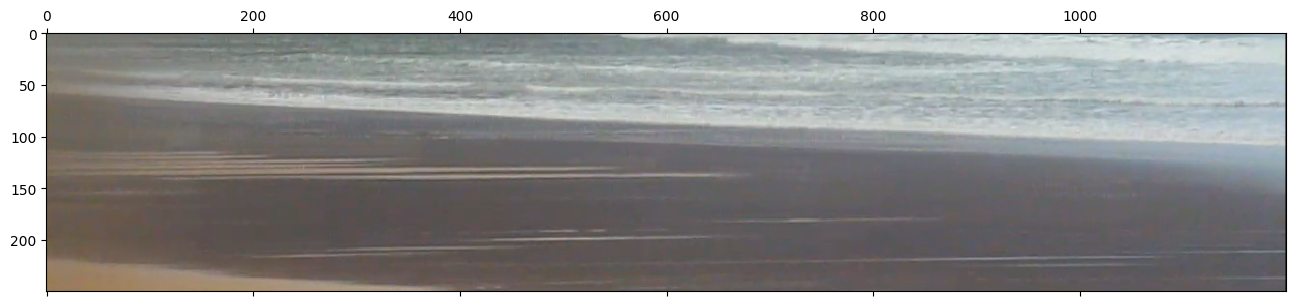

In [176]:
plt.matshow(imagen[250:500,:],cmap='gray')
plt.show

In [128]:
img = plt.imread("/root/code/iamjustnick/wavewatcher/raw_data/NigranBee__ocean__2022-11-29_09_01_15__164.png")

In [129]:
img.shape

(582, 1034, 4)

#### ElPorto

In [117]:
img = cv.imread("/root/code/iamjustnick/wavewatcher/raw_data/ElPortoBee__ocean__2022.png",0)
edges = cv.Canny(img,256,256)

In [120]:
img = plt.imread("/root/code/iamjustnick/wavewatcher/raw_data/ElPortoBee__ocean__2022.png")

In [121]:
img.shape

(624, 1110, 4)

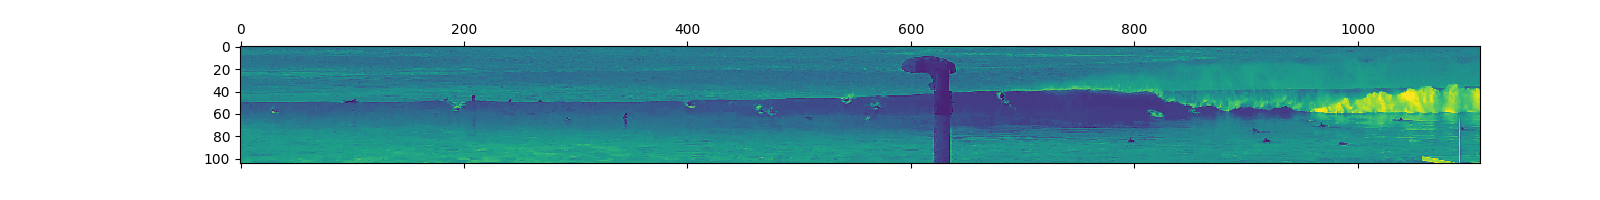

In [118]:
plt.matshow(img[350:-170,:])

In [51]:
edges = cv.Canny(img[350:-170,:],50,250)
gaussian = cv.adaptiveThreshold(img[350:-170,:],255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY,9,5)

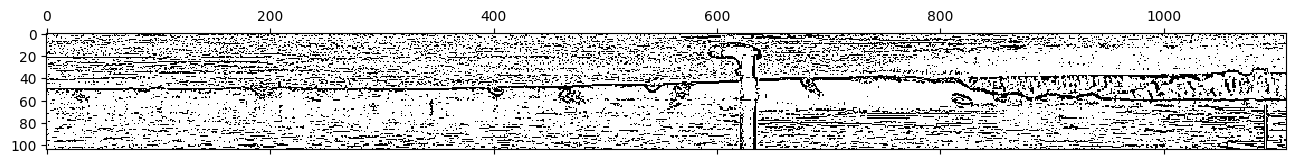

In [52]:
plt.matshow(gaussian,cmap='gray')

#### Hawai

In [122]:
path_hawai_1 = "/root/code/iamjustnick/wavewatcher/raw_data/Hawai/HawaiBee__ocean__2022-11-28_12_03_58__143.png"
path_hawai_2 = "/root/code/iamjustnick/wavewatcher/raw_data/Hawai/HawaiBee__ocean__2022-11-28_16_54_35__102.png"
path_hawai_3 = "/root/code/iamjustnick/wavewatcher/raw_data/Hawai/HawaiBee__ocean__2022-11-28_17_07_56__101.png"

In [ ]:
hawai_1 = cv.imread(path_hawai_1,0)
hawai_2 = cv.imread(path_hawai_2,0)
hawai_3 = cv.imread(path_hawai_3,0)
hawai = [hawai_1,hawai_2,hawai_3]

In [123]:
hawai_1 = plt.imread(path_hawai_1)

In [124]:
hawai_1.shape

(570, 1015, 4)

In [ ]:
for i in range(3):
    plt.subplot(2,2,i+1),plt.imshow(hawai[i][250:500,100:],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

In [ ]:
plt.matshow(hawai_3[250:-100,100:],cmap='gray')
plt.show

In [ ]:
edges5 = cv.Canny(hawai_3[250:-100,100:],50,50)
plt.matshow(edges5)

In [ ]:
gaussian = cv.adaptiveThreshold(hawai_3[250:-100,100:],255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY,13,3)
plt.matshow(gaussian,cmap='gray')

#### Nigran

#### Zarautz

In [125]:
path_zarautz_1 = "/root/code/iamjustnick/wavewatcher/raw_data/Zarautz/ZarautzBee__ocean__2022-11-28_10_33_11__103.png"
path_zarautz_2 = "/root/code/iamjustnick/wavewatcher/raw_data/Zarautz/ZarautzBee__ocean__2022-11-28_10_37_38__113.png"
path_zarautz_3 = "/root/code/iamjustnick/wavewatcher/raw_data/Zarautz/ZarautzBee__ocean__2022-11-28_14_40_43__165.png"

In [126]:
zarautz_1 = plt.imread(path_zarautz_1)
zarautz_2 = cv.imread(path_zarautz_2,0)
zarautz_3 = cv.imread(path_zarautz_3,0)
zarautz = [zarautz_1,zarautz_2,zarautz_3]

In [127]:
zarautz_1.shape

(624, 1200, 4)

In [ ]:
plt.matshow(zarautz_1[150:,:],cmap='gray')
plt.show

In [ ]:
cropped = zarautz_3[150:,:]

In [ ]:
edges5 = cv.Canny(cropped,100,100)
plt.matshow(edges5)

In [ ]:
th3 = cv.adaptiveThreshold(cropped,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY,11,3)

In [ ]:
plt.matshow(th3,cmap='gray')

### Red threshold

In [178]:
imagen = plt.imread("/root/code/iamjustnick/wavewatcher/raw_data/ElPortoBee__ocean__2022.png")

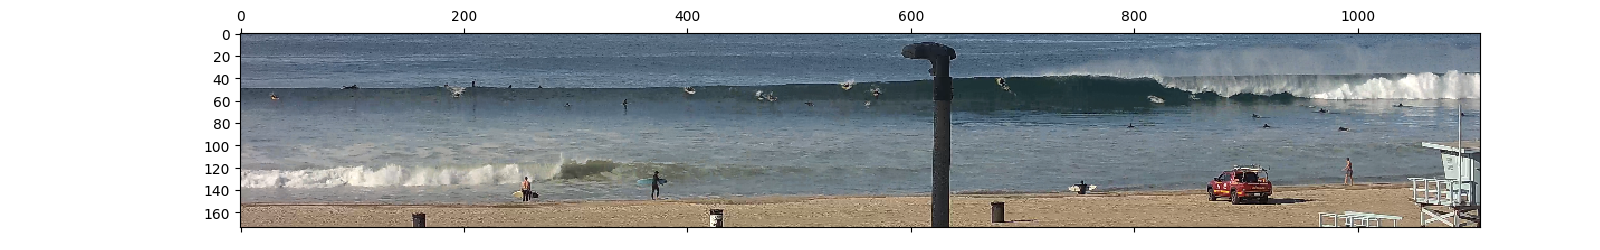

In [184]:
plt.matshow(imagen[350:-100,:])

In [179]:
imagen.shape

(624, 1110, 4)

In [180]:
a = preprocess_image(imagen,300)

In [192]:
np.array(a).T.shape

(300, 300, 8)

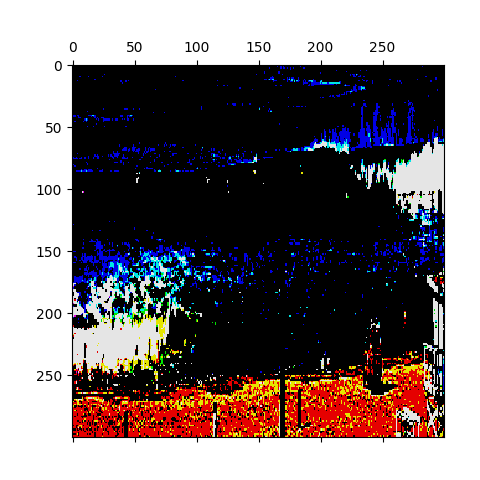

In [189]:
plt.matshow(np.array(a[5:]).T)

In [84]:
plt.matshow(a[8])

IndexError: list index out of range

In [202]:
imagen = cv.cvtColor(imagen, cv.COLOR_BGRA2BGR)

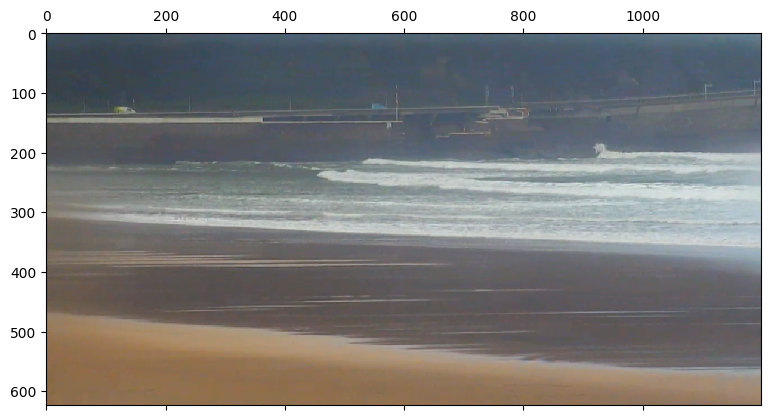

In [203]:
plt.matshow(imagen)

In [204]:
cropped = imagen[250:500,:]

In [205]:
cropped = cv.resize(cropped,(400,400),interpolation = cv.INTER_AREA)

In [206]:
blurred = cv.GaussianBlur(cropped, (7, 7), 0)

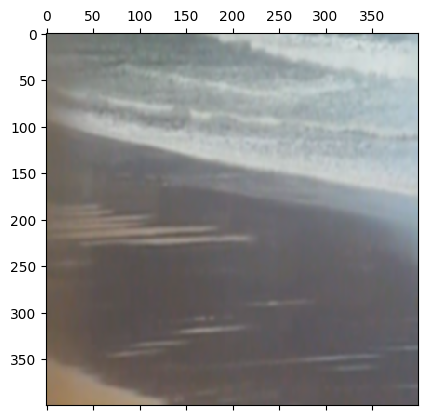

In [207]:
plt.matshow(blurred)

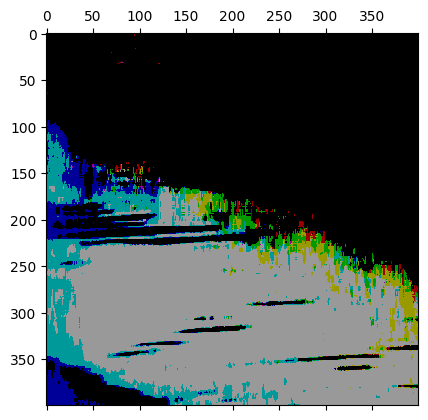

In [208]:
# (T, thresh) = cv.threshold(blurred, 0, 255,
#                             cv.THRESH_BINARY)  #cv2.THRESH_OTSU
(T, thresh) = cv.threshold( cropped, 0.4, 0.6,
                            cv.THRESH_BINARY_INV)  #cv2.THRESH_OTSU
plt.matshow(thresh)

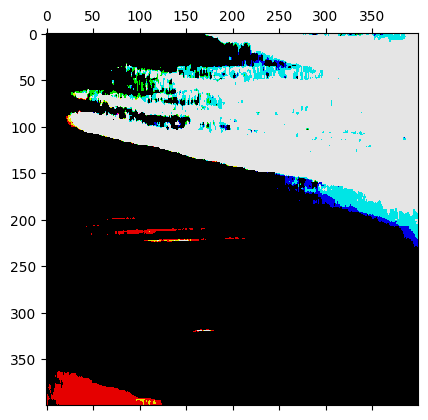

In [211]:
(T, thresh) = cv.threshold(cropped, 0.6, 0.9, cv.THRESH_BINARY)
plt.matshow(thresh, cmap="gray")

## Greyscalling

In [ ]:
from PIL import Image

In [ ]:

img = img.convert('L')

## Normallizing

This can be done by adding a layer in the CNN

In [ ]:
 model.add(Rescaling(1./255, input_shape=(256,256,1)))

## Train and test split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7)

## Data augmentation

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
datagen = ImageDataGenerator(
    featurewise_center = False,
    featurewise_std_normalization = False,
    rotation_range = 10,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    horizontal_flip = True,
    zoom_range = (0.8, 1.2),
    ) 

In [ ]:
X_augmented_iterator = datagen.flow(X_train, shuffle=False, batch_size=1)
X_augmented_iterator
datagen.fit(X_train)
datagen

## Small dataset

In [ ]:
# Considering only 1/10th of the 50_000 images
reduction_factor = 10
# Choosing the random indices of small train set and small test set
idx_train =  np.random.choice(len(images_train), round(len(images_train)/reduction_factor))
idx_test =  np.random.choice(len(images_test), round(len(images_test)/reduction_factor))
# Collecting the two subsamples images_train_small and images_test_small from images_train and images_test
images_train_small = images_train[idx_train]
images_test_small = images_test[idx_test]
# and their corresponding labels
labels_train_small = labels_train[idx_train]
labels_test_small = labels_test[idx_test]
print("------------------ Before -----------------")
print(images_train.shape, images_test.shape)
print("")
print("--- After applying the reduction factor ---")
print(images_train_small.shape, images_test_small.shape)
print("")
print("-"*43)
unique, counts = np.unique(labels_train_small, return_counts=True)
dict(zip(unique, counts))